<a href="https://colab.research.google.com/github/azrizalg/azrizalg/blob/main/BRI_Data_Hackathon_People_Analytic_attempt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore')

SEED = 42

In [ ]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

#fungsi one hot encoder
def ohc(dfNya,dfTest, colName, daList):
  colIndex = dfNya.columns.get_loc(colName)
  ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [colIndex])], remainder='drop')
  arr = ct.fit_transform(dfNya)
  arr_test = ct.transform(dfTest)
  for i in daList:
    dfNya[i]= arr[:,daList.index(i)]#masukin data dari array arr, ke dfNya
    dfTest[i]= arr_test[:,daList.index(i)]
  dfNya = dfNya.drop(columns=[colName])#delte colName columns as we have new one from OHC
  dfTest = dfTest.drop(columns=[colName])
  return dfNya, dfTest

df_train = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/24418/1735609/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1609883295&Signature=DB7IlB6tpbzuM4vUUjZlfLbMurUR9g6D8J7WDf7MPNVzjxfRhXvKCOg%2BLkCCsSO5ie6dXJCirhxjIzhkOuJD6IatigCfljYusgXgOif%2Fa0mob4SenLgyXiDhItnkDwXdpiE1DZQiSPj9H%2FBPL%2Fjb%2Fxx0CWKiQwYh01IjsIXUxuZnzKQSv7E4A%2Bx71Ood6bsegxm9t43ESJ2bo9R9vcYsiC2LNobb0u4W3bg3otT9KvaN3yLVs3Op8rO953gHS2Rb1GF2wG4ZMjvqKdODcCLVsCYM1joTsUzK2aYqZAerAN5TK7PAhXjNUM7ad5cYF0Pb0Jpa%2FSct%2FMIHElvpOQg1Fw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip')
X_train = df_train.loc[:, ['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3', 'Best Performance']]
y = df_train.loc[:, ['Best Performance']]
df_test = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/competitions/24418/1735609/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1609883304&Signature=l1PzWZ65%2FO8irt2b0jcjlCiwXPwC0Ozt3COD8XpM%2Fil7B2%2FY6JgLqgG9pldqCt23svJJML488syM4XlJrvuc574%2BozBpfdMF5x4OPs0JYr9%2FOf1QVXCi9Pa6HNCCAVxHkwfob5xfSJNtWRf9JjFitF7wZpbgqEhJbCPC8oWn6k2Sq0DR19PdHqpPM34mH4mjFWIj55DIx8UrQFCpVyR6WFUdZy8FHHwu3EhWSna%2BLe2fISBE2BaFuaI3AvmnEvAlfnCuFUZs0UEfJyyzZIwN9oTDNVSvb1fXvCwLKhwnBdgS10%2BMaUWT8c5Dbo1pLYLnyqOGztKwiJYYUwf67Xn1kw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv')
df_all = concat_df(df_train, df_test)
X_test = df_test

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(y.shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 22005
Number of Test Examples = 6000

Training X Shape = (22005, 30)
Training y Shape = 22005

Test X Shape = (6000, 29)
Test y Shape = 6000

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3'],
      dtype='object')
Index(['job_level', 'job_duration_i

# 1.   Exploratory Data Analysis

### Overview

*   job_level : Level Jabatan Pekerja
*   job_duration_in_current_job_level : Masa Kerja pada job level saat ini
*   person_level : Level personal Pekerja
*   job_duration_in_current_person_level : Masa Kerja pada person level saat ini
*   job_duration_in_current_branch : Masa Kerja pada unit kerja saat ini
*   Employee_type : Tipe Pekerja ( 3 tipe Relationship Manager, 
  *   A :  Mantri Kupedes, 
  *   B : Mantri KUR , dan 
  *   C : Mantri Briguna)
*   Employee_status : Status Pekerja (tetap/kontrak)
*   gender : Jenis Kelamin
  *   Male
  *   Female
*   age : Tahun Lahir
*   marital_status_maried(Y/N) : Status Pernikahan (Y / N)
*   number_of_dependences : Jumlah anak dalam tanggungan
*   number_of_dependences (male) : Jumlah anak dalam tanggungan khusus laki - laki
*   number_of_dependences (female) : Jumlah anak dalam tanggungan khusus perempuan
*   Education_level :
  *   0: Internal course/sem, 
  *   1: SLTA/*   Setingkat, 
  *   2: Diploma 1, 
  *   3: Diploma 3/4, 
  *   4: Strata1, 
  *   5: Strata2
*   GPA : IPK
*   year_graduated : Tahun lulus
*   job_duration_as_permanent_worker : lama bekerja sebagai pekerja tetap
*   job_duration_from_training : lama bekerja mulai dari training
*   branch_rotation : Jumlah rotasi pindah unit kerja
*   job_rotation : jumlah rotasi pindah jabatan
*   assign_of_otherposition : jumlah rotasi penugasan
*   annual leave : cuti tahunan
*   sick_leaves : izin sakit
*   Best Performance : Termasuk dalam best performance
  *   1 = Best performance
  *   0 = not best performance
*   Avg_achievement_% : rata - rata presentase pencapaian terhadap target selama setahun
*   Last_achievement_% : presentase pencapaian triwulan terakhir terhadap target
*   Achievement_above_100%_during3quartal : Jumlah pencapaian diatas 100% dalam 3 tahun terkahir
*   achievement_target_1 : status pencapaian target kategori 1
*   achievement_target_2 : status pencapaian target kategori 2
*   achievement_target_3 : status pencapaian target kategori 3



In [ ]:
print('Missing values in X_train')
print(X_train.isnull().sum())

print('\n\n')

print('Missing values in df_test')
print(df_test.isnull().sum())

Missing values in X_train
job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3608
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual l

# Preprocessing

## Duplicates

In [ ]:
print(X_train.duplicated().sum())
print(X_train.duplicated().sum())

111
111


In [ ]:
X_train.drop_duplicates(keep=False,inplace=True) 

## Missing Value & label encoding

In [ ]:
X_train = X_train.dropna()

### job_level

In [ ]:
print(X_train['job_level'].value_counts(), '\n')
print(X_train['job_level'].isnull().any())

JG04    10897
JG05      796
JG03       33
JG06        1
Name: job_level, dtype: int64 

False


In [ ]:
mapping = {'JG03': 1, 'JG04': 2, 'JG05': 3, 'JG06': 4} #tweakable, mapping can start from 0

X_train['job_level'] = X_train['job_level'].replace(mapping)
X_test['job_level'] = X_test['job_level'].replace(mapping)

### person_level

In [ ]:
print(X_train['person_level'].value_counts(), '\n')
print(X_train['person_level'].isnull().any())

PG03    10118
PG04      773
PG06      436
PG05      349
PG07       18
PG02       17
PG01       15
PG08        1
Name: person_level, dtype: int64 

False


In [ ]:
mapping = {'PG01': 1, 'PG02': 2, 'PG03': 3, 'PG04': 4, 'PG05': 5, 'PG06': 6, 'PG07': 7, 'PG08': 8} #tweakable, mapping can start from 0

X_train['person_level'] = X_train['person_level'].replace(mapping)
X_test['person_level'] = X_test['person_level'].replace(mapping)

### age

In [ ]:
#rubah format age
X_train['age'] = X_train['age'].apply(lambda x: 2020-x)
X_test['age'] = X_test['age'].apply(lambda x: 2020-x)

### Employee_type

In [ ]:
X_train = X_train[X_train['Employee_type'].notna()]

In [ ]:
print(X_train['Employee_type'].value_counts())
print(X_train.columns.get_loc('Employee_type'))

RM_type_A    7631
RM_type_B    3558
RM_type_C     538
Name: Employee_type, dtype: int64
5


In [ ]:
"""
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='drop')
arr = ct.fit_transform(X_train)
X_train["RM_type_A"], X_train["RM_type_B"], X_train['RM_type_C'] = arr.T #masukin hasil one hot encoder
X_train = X_train.drop(columns=['Employee_type'])#delte Employee_type columns as we replace it from OHC
"""

#varian lain dari kode diatas
#df["Q_pred"],df["r_pred"] = arr[:,0], arr[:,1]  
#y = pd.get_dummies(X_train.Employee_type, prefix='ET')

'\nct = ColumnTransformer(transformers=[(\'encoder\', OneHotEncoder(), [5])], remainder=\'drop\')\narr = ct.fit_transform(X_train)\nX_train["RM_type_A"], X_train["RM_type_B"], X_train[\'RM_type_C\'] = arr.T #masukin hasil one hot encoder\nX_train = X_train.drop(columns=[\'Employee_type\'])#delte Employee_type columns as we replace it from OHC\n'

### Employee_status

In [ ]:
print(X_train['Employee_status'].value_counts())
print(X_train.columns.get_loc('Employee_status'))

Permanent    11727
Name: Employee_status, dtype: int64
6


In [ ]:
X_train = X_train.drop(columns='Employee_status')
X_test = X_test.drop(columns='Employee_status')

### gender

In [ ]:
print(X_train['gender'].value_counts())
print(X_train.columns.get_loc('gender'))

Male      8591
Female    3136
Name: gender, dtype: int64
6


### marital_status_maried(Y/N)

In [ ]:
print(X_train['marital_status_maried(Y/N)'].value_counts())
print(X_train.columns.get_loc('marital_status_maried(Y/N)'))

Y    9991
N    1736
Name: marital_status_maried(Y/N), dtype: int64
8


### number_of_dependences male and female

In [ ]:
#hapus aja kolom NOP male sama NOP female
X_train = X_train.drop(columns=['number_of_dependences (male)', 'number_of_dependences (female)'])
X_test = X_test.drop(columns=['number_of_dependences (male)', 'number_of_dependences (female)'])

### Education_level

In [ ]:
X_train['Education_level'].value_counts().sort_index()

level_0      16
level_1     168
level_2       5
level_3    1849
level_4    9639
level_5      50
Name: Education_level, dtype: int64

In [ ]:
X_train[X_train['Education_level'].isnull() & X_train['GPA'].isnull() & X_train['year_graduated'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,Best Performance


In [ ]:
#label encoder education_level 
mapping = {'level_0': 1, 'level_1': 2, 'level_2': 3, 'level_3': 4, 'level_4': 5, 'level_5': 6} #tweakable, mapping can start from 0

X_train['Education_level'] = X_train['Education_level'].replace(mapping)
X_test['Education_level'] = X_test['Education_level'].replace(mapping)


In [ ]:
#fill missing value with median Education_level
X_train['Education_level'].fillna((X_train['Education_level'].median()), inplace=True)

### GPA

In [ ]:
#fill missing value with mean on GPA
X_train['GPA'].nunique()
X_train['GPA'].value_counts()

X_train['GPA'].fillna((X_train['GPA'].mean()), inplace=True)

In [ ]:
X_test['GPA'].value_counts()

0.00      1246
3.00       183
3.01       124
3.03       106
3.14       104
          ... 
2.07         1
345.00       1
2.48         1
280.00       1
6.18         1
Name: GPA, Length: 179, dtype: int64

In [ ]:
#outlier pada GPA (nilai yang melebihi 4.0)
X_train['GPA'][X_train['GPA']>4].count()

58

In [ ]:
X_test['GPA'][X_test['GPA']>4].count()

28

In [ ]:
#rubah outlier menjadi median
X_train['GPA'][X_train['GPA']>4] = X_train['GPA'].median()
X_test['GPA'][X_test['GPA']>4] = X_test['GPA'].median()

### year_graduated

In [ ]:
print(X_train['year_graduated'].mode())
print(X_test['year_graduated'].mode())

0    2011
dtype: object
0    2011
dtype: object


In [ ]:
#fill mising value year_graduated
#pd.to_numeric(s, errors='coerce')
#df["a"] = pd.to_numeric(df["a"])
X_train["year_graduated"] = pd.to_numeric(X_train["year_graduated"], errors='coerce') #ganti ke numeric secara paksa, segala bentuk bukan numerik akan dijadikan null, karena di dalam dataset ada yg ngisi N dan sebagainya
X_train["year_graduated"] = X_train[["year_graduated"]].apply(pd.to_numeric)

X_test["year_graduated"] = pd.to_numeric(X_test["year_graduated"], errors='coerce') #ganti ke numeric secara paksa, segala bentuk bukan numerik akan dijadikan null, karena di dalam dataset ada yg ngisi N dan sebagainya
X_test["year_graduated"] = X_test[["year_graduated"]].apply(pd.to_numeric)

#X_train = X_train['year_graduated'][X_train['year_graduated'] == 0] = 2013
X_train['year_graduated'] = X_train['year_graduated'].fillna(2013) #yang null isi 2013
X_test['year_graduated'] = X_test['year_graduated'].fillna(2013)

In [ ]:
X_test['year_graduated'].median()

2010.0

In [ ]:
#jika year_graduated > 2020 maka jadikan tahun tersebut menjadi 2020, untuk yang nilai nya dibawah 1900 ganti median saja
X_train['year_graduated'][X_train['year_graduated'] > 2020] = X_train['year_graduated'].median()
X_test['year_graduated'][X_test['year_graduated'] > 2020] = X_train['year_graduated'].median()

X_train['year_graduated'][X_train['year_graduated'] < 1950] = X_train['year_graduated'].median()
X_test['year_graduated'][X_test['year_graduated'] < 1950] = X_train['year_graduated'].median()

In [ ]:
X_test['year_graduated'].count()

6000

In [ ]:
X_train['year_graduated'].value_counts().sort_index()

1983.0       3
1984.0       1
1985.0       8
1986.0       7
1987.0      13
1988.0      11
1989.0       8
1990.0      11
1991.0      12
1992.0      18
1993.0      21
1994.0      25
1995.0      28
1996.0      38
1997.0      12
1998.0      33
1999.0      38
2000.0      66
2001.0     115
2002.0     186
2003.0     237
2004.0     286
2005.0     297
2006.0     424
2007.0     679
2008.0    1096
2009.0    1237
2010.0    1869
2011.0    1733
2012.0    1387
2013.0     944
2014.0     631
2015.0     163
2016.0      45
2017.0      31
2018.0      10
2019.0       3
2020.0       1
Name: year_graduated, dtype: int64

In [ ]:
X_train['year_graduated'].isnull().sum()

0

In [ ]:
X_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,Best Performance
0,3,8.00,6,8.00,0.50,RM_type_A,Female,56,Y,3,5,2.32,1987.0,30.0,30,9,7,0,8,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached,0
1,2,5.17,4,2.00,1.25,RM_type_A,Male,41,Y,3,5,3.25,2001.0,15.0,16,7,7,9,3,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached,0
2,2,1.83,3,1.83,1.50,RM_type_A,Male,40,Y,1,6,3.23,2007.0,15.0,15,9,9,0,6,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached,0
3,2,7.92,4,4.00,0.17,RM_type_A,Male,36,Y,0,4,0.00,2006.0,8.0,8,5,5,0,3,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached,0
6,2,1.75,3,1.75,1.33,RM_type_B,Female,34,N,0,5,3.65,2008.0,6.0,6,7,5,0,0,2,66.816667,70.43,0.0,achiev_50%-100%,achiev_< 50%,reached,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,3,2.67,6,0.50,1.50,RM_type_A,Female,55,Y,2,5,0.00,1991.0,26.0,26,11,11,1,0,0,85.590000,89.37,1.0,Pencapaian 50%-100%,Pencapaian < 50%,reached,0
21999,2,1.92,3,1.92,2.17,RM_type_A,Male,33,Y,0,5,3.12,2009.0,5.0,5,2,2,0,9,2,68.230000,76.66,0.0,Pencapaian 50%-100%,Pencapaian < 50%,reached,0
22000,2,1.50,3,1.50,3.42,RM_type_B,Male,34,Y,1,5,2.84,2009.0,5.0,5,2,2,0,2,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0
22002,2,1.50,3,1.50,0.00,RM_type_A,Male,37,Y,2,5,3.10,2006.0,7.0,7,5,4,0,3,2,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0


### job_duration_as_permanent_worker

In [ ]:
#jika dilihat, nilai job_duration_as_permanent_worker = job_duration_from_training, maka missing data di job_duration_as_permanent_worker diambil dari job_duration_from_training 
X_train['job_duration_as_permanent_worker'] = X_train['job_duration_as_permanent_worker'].fillna(X_train.job_duration_from_training)

In [ ]:
X_train[['job_duration_as_permanent_worker','job_duration_from_training']].head(20)

,job_duration_as_permanent_worker,job_duration_from_training
0,30.0,30
1,15.0,16
2,15.0,15
3,8.0,8
6,6.0,6
8,6.0,6
9,5.0,5
12,5.0,5
13,5.0,5
15,4.0,4


### Avg_achievement_% and Last_achievement_% 

In [ ]:
#kedua variabel ini memiliki hubungan korelasi linear, jadi saya memutuskan menggunakan yang average
X_train.drop(columns=['Last_achievement_%'], inplace=True)
X_test.drop(columns=['Last_achievement_%'], inplace=True)

#untuk missing values pada Avg_achievement_%, kita coba fillna menggunakan mean()
X_train['Avg_achievement_%'].fillna((X_train['Avg_achievement_%'].mean()), inplace=True)

### Achievement_above_100%_during3quartal

In [ ]:
X_train['Achievement_above_100%_during3quartal'].fillna(0, inplace=True)
X_train['Achievement_above_100%_during3quartal'].isnull().any()

False

### achievement_target_1

In [ ]:
X_train['achievement_target_1'].value_counts().sort_index()

Pencapaian 100%-150%       385
Pencapaian 50%-100%       1187
Pencapaian < 50%           143
Pencapaian > 1.5            39
Tidak diberikan target     125
achiev_100%-150%          1929
achiev_50%-100%           5823
achiev_< 50%              1668
achiev_> 1.5               428
Name: achievement_target_1, dtype: int64

In [ ]:
#achiev dan Pencapaian samain aja
mapping = {'Tidak diberikan target': 1, 
           'achiev_> 1.5': 2, 
           'achiev_< 50%': 3, 
           'achiev_50%-100%': 4,
           'achiev_100%-150%': 5,
           'Pencapaian > 1.5': 2,
           'Pencapaian < 50%': 3,
           'Pencapaian 50%-100%': 4,
           'Pencapaian 100%-150%': 5,
           
           } #tweakable, mapping can start from 0

X_train['achievement_target_1'] = X_train['achievement_target_1'].replace(mapping)
X_test['achievement_target_1'] = X_test['achievement_target_1'].replace(mapping)

X_train['achievement_target_1'].fillna(0, inplace=True)

In [ ]:
print(X_train[X_train['achievement_target_1'].isnull()].shape) #jumlah acivment_target_1 nya null
print(X_train[X_train['achievement_target_1'].isnull()& X_train['achievement_target_2'].isnull() & X_train['achievement_target_3'].isnull()].shape)#jumlah semua acivment null

(0, 26)
(0, 26)


In [ ]:
#coba pake ohc
#X_train = ohc(X_train,'achievement_target_1', ['at1_1','at1_2','at1_3','at1_4','at1_5','at1_6','at1_7','at1_8','at1_9'])

### achievement_target_2

In [ ]:
X_train['achievement_target_2'].value_counts().sort_index()

Pencapaian 100%-150%       122
Pencapaian 50%-100%        395
Pencapaian < 50%          1193
Pencapaian > 1.5            46
Tidak diberikan target     135
achiev_100%-150%           685
achiev_50%-100%           1764
achiev_< 50%              6707
achiev_> 1.5               680
Name: achievement_target_2, dtype: int64

In [ ]:
#same as achievment_target_1
mapping = {'Tidak diberikan target': 1, 
           'achiev_> 1.5': 2, 
           'achiev_< 50%': 3, 
           'achiev_50%-100%': 4,
           'achiev_100%-150%': 5,
           'Pencapaian > 1.5': 2,
           'Pencapaian < 50%': 3,
           'Pencapaian 50%-100%': 4,
           'Pencapaian 100%-150%': 5,
           
           } #tweakable, mapping can start from 0

X_train['achievement_target_2'] = X_train['achievement_target_2'].replace(mapping)
X_test['achievement_target_2'] = X_test['achievement_target_2'].replace(mapping)

X_train['achievement_target_2'].fillna(0, inplace=True)

print(X_train[X_train['achievement_target_2'].isnull()].shape) #jumlah acivment_target_2 yang null


(0, 26)


### achievment_target_3

In [ ]:
X_train['achievement_target_3'].value_counts().sort_index()

not reached    3306
not_reached      13
reached        8408
Name: achievement_target_3, dtype: int64

In [ ]:
mapping = {'not reached': 0, 
           'not_reached': 0, 
           'reached': 1} #tweakable, bisa make ohc

X_train['achievement_target_3'] = X_train['achievement_target_3'].replace(mapping)
X_test['achievement_target_3'] = X_test['achievement_target_3'].replace(mapping)

X_train['achievement_target_3'].fillna(0, inplace=True)

print(X_train[X_train['achievement_target_3'].isnull()].shape) #jumlah acivment_target_3 nya null

(0, 26)


## One hot encoder

In [ ]:
print(X_train.shape)
print(X_test.shape)

(11727, 26)
(6000, 25)


In [ ]:
y_train = X_train['Best Performance']
X_train = X_train.drop(columns='Best Performance')

In [ ]:
X_train, X_test = ohc(X_train, X_test,'Employee_type', ['RM_type_A','RM_type_B', 'RM_type_C'])

In [ ]:
X_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,RM_type_A,RM_type_B,RM_type_C
0,3,8.00,6,8.00,0.50,Female,56,Y,3,5,2.32,1987.0,30.0,30,9,7,0,8,0,68.850000,0.0,4,3,1,1.0,0.0,0.0
1,2,5.17,4,2.00,1.25,Male,41,Y,3,5,3.25,2001.0,15.0,16,7,7,9,3,0,94.810000,3.0,4,4,1,1.0,0.0,0.0
2,2,1.83,3,1.83,1.50,Male,40,Y,1,6,3.23,2007.0,15.0,15,9,9,0,6,0,72.820000,0.0,5,3,0,1.0,0.0,0.0
3,2,7.92,4,4.00,0.17,Male,36,Y,0,4,0.00,2006.0,8.0,8,5,5,0,3,0,86.890000,2.0,4,4,0,1.0,0.0,0.0
6,2,1.75,3,1.75,1.33,Female,34,N,0,5,3.65,2008.0,6.0,6,7,5,0,0,2,66.816667,0.0,4,3,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,3,2.67,6,0.50,1.50,Female,55,Y,2,5,0.00,1991.0,26.0,26,11,11,1,0,0,85.590000,1.0,4,3,1,1.0,0.0,0.0
21999,2,1.92,3,1.92,2.17,Male,33,Y,0,5,3.12,2009.0,5.0,5,2,2,0,9,2,68.230000,0.0,4,3,1,1.0,0.0,0.0
22000,2,1.50,3,1.50,3.42,Male,34,Y,1,5,2.84,2009.0,5.0,5,2,2,0,2,0,71.776667,0.0,4,4,1,0.0,1.0,0.0
22002,2,1.50,3,1.50,0.00,Male,37,Y,2,5,3.10,2006.0,7.0,7,5,4,0,3,2,108.856667,3.0,4,4,1,1.0,0.0,0.0


In [ ]:
X_train, X_test = ohc(X_train, X_test,'gender', ['Male','Female'])

In [ ]:
X_train, X_test = ohc(X_train, X_test,'marital_status_maried(Y/N)', ['married','notMarried'])

## X_test

### label encoding

In [ ]:
"""mapping = {'JG03': 1, 'JG04': 2, 'JG05': 3, 'JG06': 4} #tweakable, mapping can start from 0
X_test['job_level'] = X_test['job_level'].replace(mapping)

mapping = {'PG01': 1, 'PG02': 2, 'PG03': 3, 'PG04': 4, 'PG05': 5, 'PG06': 6, 'PG07': 7, 'PG08': 8} #tweakable, mapping can start from 0
X_test['person_level'] = X_test['person_level'].replace(mapping)

#label encoder education_level 
mapping = {'level_0': 1, 'level_1': 2, 'level_2': 3, 'level_3': 4, 'level_4': 5, 'level_5': 6} #tweakable, mapping can start from 0

X_test['Education_level'] = X_test['Education_level'].replace(mapping)

mapping = {'Tidak diberikan target': 1, 
           'achiev_> 1.5': 2, 
           'achiev_< 50%': 3, 
           'achiev_50%-100%': 4,
           'achiev_100%-150%': 5,
           'Pencapaian > 1.5': 2,
           'Pencapaian < 50%': 3,
           'Pencapaian 50%-100%': 4,
           'Pencapaian 100%-150%': 5,      
           } #tweakable, mapping can start from 0
X_test['achievement_target_1'] = X_test['achievement_target_1'].replace(mapping)

mapping = {'Tidak diberikan target': 1, 
           'achiev_> 1.5': 2, 
           'achiev_< 50%': 3, 
           'achiev_50%-100%': 4,
           'achiev_100%-150%': 5,
           'Pencapaian > 1.5': 2,
           'Pencapaian < 50%': 3,
           'Pencapaian 50%-100%': 4,
           'Pencapaian 100%-150%': 5,     
           } #tweakable, mapping can start from 0
X_test['achievement_target_2'] = X_test['achievement_target_2'].replace(mapping)

mapping = {'not reached': 0, 
           'not_reached': 0, 
           'reached': 1} #tweakable, bisa make ohc
X_test['achievement_target_3'] = X_test['achievement_target_3'].replace(mapping)
"""

"mapping = {'JG03': 1, 'JG04': 2, 'JG05': 3, 'JG06': 4} #tweakable, mapping can start from 0\nX_test['job_level'] = X_test['job_level'].replace(mapping)\n\nmapping = {'PG01': 1, 'PG02': 2, 'PG03': 3, 'PG04': 4, 'PG05': 5, 'PG06': 6, 'PG07': 7, 'PG08': 8} #tweakable, mapping can start from 0\nX_test['person_level'] = X_test['person_level'].replace(mapping)\n\n#label encoder education_level \nmapping = {'level_0': 1, 'level_1': 2, 'level_2': 3, 'level_3': 4, 'level_4': 5, 'level_5': 6} #tweakable, mapping can start from 0\n\nX_test['Education_level'] = X_test['Education_level'].replace(mapping)\n\nmapping = {'Tidak diberikan target': 1, \n           'achiev_> 1.5': 2, \n           'achiev_< 50%': 3, \n           'achiev_50%-100%': 4,\n           'achiev_100%-150%': 5,\n           'Pencapaian > 1.5': 2,\n           'Pencapaian < 50%': 3,\n           'Pencapaian 50%-100%': 4,\n           'Pencapaian 100%-150%': 5,      \n           } #tweakable, mapping can start from 0\nX_test['achievemen

### OHC

In [ ]:
#X_test = ohc(X_test,'Employee_type', ['RM_type_A','RM_type_B', 'RM_type_C'])
#X_test = ohc(X_test,'Employee_status', ['ES_Contract','ES_Permanent'])
#X_test = ohc(X_test,'gender', ['Male','Female'])
#X_test = ohc(X_test,'marital_status_maried(Y/N)', ['married','notMarried'])

### Misc

## test

In [ ]:
X_train.duplicated().sum()

0

## Feature Scalling

In [ ]:
X_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,RM_type_A,RM_type_B,RM_type_C,Male,Female,married,notMarried
0,3,8.00,6,8.00,0.50,56,3,5,2.32,1987.0,30.0,30,9,7,0,8,0,68.850000,0.0,4,3,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,5.17,4,2.00,1.25,41,3,5,3.25,2001.0,15.0,16,7,7,9,3,0,94.810000,3.0,4,4,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,1.83,3,1.83,1.50,40,1,6,3.23,2007.0,15.0,15,9,9,0,6,0,72.820000,0.0,5,3,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2,7.92,4,4.00,0.17,36,0,4,0.00,2006.0,8.0,8,5,5,0,3,0,86.890000,2.0,4,4,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,2,1.75,3,1.75,1.33,34,0,5,3.65,2008.0,6.0,6,7,5,0,0,2,66.816667,0.0,4,3,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,3,2.67,6,0.50,1.50,55,2,5,0.00,1991.0,26.0,26,11,11,1,0,0,85.590000,1.0,4,3,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
21999,2,1.92,3,1.92,2.17,33,0,5,3.12,2009.0,5.0,5,2,2,0,9,2,68.230000,0.0,4,3,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
22000,2,1.50,3,1.50,3.42,34,1,5,2.84,2009.0,5.0,5,2,2,0,2,0,71.776667,0.0,4,4,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
22002,2,1.50,3,1.50,0.00,37,2,5,3.10,2006.0,7.0,7,5,4,0,3,2,108.856667,3.0,4,4,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,RM_type_A,RM_type_B,RM_type_C,Male,Female,married,notMarried
0,3,1.42,5,1.42,0.50,37,2,4,3.75,2004.0,13.0,14,7,9,1,3,1,79.506667,1.0,4,3,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2,1.58,3,1.58,2.00,32,0,5,3.07,2011.0,4.0,4,2,2,2,4,1,54.283333,0.0,3,3,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,1.83,3,1.83,1.50,32,1,5,3.23,2011.0,4.0,4,3,2,0,2,0,43.016667,0.0,4,3,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,8.00,6,5.00,1.50,47,3,5,0.00,2013.0,22.0,22,8,5,11,3,0,74.390000,0.0,4,3,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2,1.92,3,1.92,0.50,35,1,4,3.86,2008.0,6.0,6,6,3,0,3,0,106.376667,3.0,4,2,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,2.75,1,2.75,2.75,33,0,5,0.00,2010.0,3.0,3,1,1,0,1,0,49.396667,0.0,4,3,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5996,2,1.17,3,1.17,0.50,33,1,4,3.40,2011.0,4.0,4,3,3,0,0,0,76.590000,0.0,4,3,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5997,2,1.83,3,1.83,1.92,34,2,5,3.47,2009.0,7.0,7,5,3,0,3,0,97.906667,3.0,5,5,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5998,2,1.92,3,1.92,1.25,36,0,5,3.22,2008.0,6.0,6,5,3,0,1,0,82.833333,0.0,5,4,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,RM_type_A,RM_type_B,RM_type_C,Male,Female,married,notMarried
0,3,8.00,6,8.00,0.50,56,3,5,2.32,1987.0,30.0,30,9,7,0,8,0,68.850000,0.0,4,3,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,5.17,4,2.00,1.25,41,3,5,3.25,2001.0,15.0,16,7,7,9,3,0,94.810000,3.0,4,4,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,1.83,3,1.83,1.50,40,1,6,3.23,2007.0,15.0,15,9,9,0,6,0,72.820000,0.0,5,3,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2,7.92,4,4.00,0.17,36,0,4,0.00,2006.0,8.0,8,5,5,0,3,0,86.890000,2.0,4,4,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,2,1.75,3,1.75,1.33,34,0,5,3.65,2008.0,6.0,6,7,5,0,0,2,66.816667,0.0,4,3,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,RM_type_A,RM_type_B,RM_type_C,Male,Female,married,notMarried
0,3,1.42,5,1.42,0.5,37,2,4,3.75,2004.0,13.0,14,7,9,1,3,1,79.506667,1.0,4,3,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2,1.58,3,1.58,2.0,32,0,5,3.07,2011.0,4.0,4,2,2,2,4,1,54.283333,0.0,3,3,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,1.83,3,1.83,1.5,32,1,5,3.23,2011.0,4.0,4,3,2,0,2,0,43.016667,0.0,4,3,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,8.00,6,5.00,1.5,47,3,5,0.00,2013.0,22.0,22,8,5,11,3,0,74.390000,0.0,4,3,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2,1.92,3,1.92,0.5,35,1,4,3.86,2008.0,6.0,6,6,3,0,3,0,106.376667,3.0,4,2,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Avg_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3', 'RM_type_A',
       'RM_type_B', 'RM_type_C', 'Male', 'Female', 'married', 'notMarried'],
      dtype='object')

In [ ]:
X_train.isnull().any()

job_level                                False
job_duration_in_current_job_level        False
person_level                             False
job_duration_in_current_person_level     False
job_duration_in_current_branch           False
age                                      False
number_of_dependences                    False
Education_level                          False
GPA                                      False
year_graduated                           False
job_duration_as_permanent_worker         False
job_duration_from_training               False
branch_rotation                          False
job_rotation                             False
assign_of_otherposition                  False
annual leave                             False
sick_leaves                              False
Avg_achievement_%                        False
Achievement_above_100%_during3quartal    False
achievement_target_1                     False
achievement_target_2                     False
achievement_t

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train_ready = X_train.values
#X_train_ready[:, :22] = sc.fit_transform(X_train_ready[:, :22])
X_train.iloc[:, :22] = sc.fit_transform(X_train.iloc[:, :22])
X_test.iloc[:, :22] = sc.transform(X_test.iloc[:, :22])

In [ ]:
X_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,RM_type_A,RM_type_B,RM_type_C,Male,Female,married,notMarried
0,3.617336,3.499378,3.921772,6.039125,-0.817011,4.641726,2.283721,0.387711,-0.126941,-5.633323,4.704213,4.584405,2.141173,1.877294,-0.463239,1.639485,-0.365325,0.092241,-0.615314,0.088564,-0.331187,0.628286,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.252441,1.780207,1.080389,0.069644,0.016534,1.455224,2.283721,0.387711,0.580386,-2.091980,1.731709,1.873578,1.327974,1.877294,3.036771,-0.244886,-0.365325,1.244069,2.090946,0.088564,1.067384,0.628286,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.252441,-0.248780,-0.340302,-0.099491,0.294382,1.242791,0.001751,2.300497,0.565175,-0.574262,1.731709,1.679947,2.141173,2.953928,-0.463239,0.885736,-0.365325,0.268387,-0.615314,1.377143,-0.331187,-1.591632,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.252441,3.450780,1.080389,2.059471,-1.183771,0.393057,-1.139234,-1.525074,-1.891455,-0.827215,0.344540,0.324534,0.514776,0.800659,-0.463239,-0.244886,-0.365325,0.892664,1.188859,0.088564,1.067384,-1.591632,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,-0.252441,-0.297378,-0.340302,-0.179084,0.105445,-0.031810,-1.139234,0.387711,0.884613,-0.321309,-0.051793,-0.062727,1.327974,0.800659,-0.463239,-1.375509,0.275106,0.002023,-0.615314,0.088564,-0.331187,0.628286,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,3.617336,0.261504,3.921772,-1.422726,0.294382,4.429292,1.142736,0.387711,-1.891455,-4.621511,3.911545,3.809883,2.954371,4.030563,-0.074349,-1.375509,-0.365325,0.834984,0.286772,0.088564,-0.331187,0.628286,1.0,0.0,0.0,1.0,0.0,0.0,1.0
21999,-0.252441,-0.194106,-0.340302,-0.009949,1.039016,-0.244243,-1.139234,0.387711,0.481513,-0.068356,-0.249960,-0.256358,-0.705022,-0.814293,-0.463239,2.016359,0.275106,0.064732,-0.615314,0.088564,-0.331187,0.628286,1.0,0.0,0.0,0.0,1.0,0.0,1.0
22000,-0.252441,-0.449248,-0.340302,-0.427813,2.428258,-0.031810,0.001751,0.387711,0.268554,-0.068356,-0.249960,-0.256358,-0.705022,-0.814293,-0.463239,-0.621760,-0.365325,0.222095,-0.615314,0.088564,1.067384,0.628286,0.0,1.0,0.0,0.0,1.0,0.0,1.0
22002,-0.252441,-0.449248,-0.340302,-0.427813,-1.372708,0.605491,1.142736,0.387711,0.466301,-0.827215,0.146373,0.130903,0.514776,0.262342,-0.463239,-0.244886,0.275106,1.867311,2.090946,0.088564,1.067384,0.628286,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Eda 2?

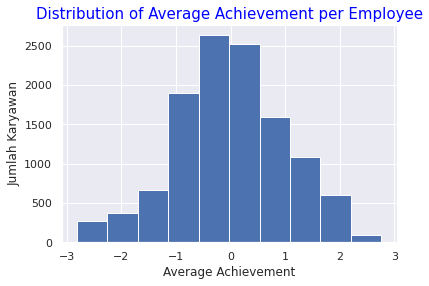

In [ ]:
# Histogram
plt.figure()
plt.hist(X_train['Avg_achievement_%'])#display range nya 1 sampai 6
plt.title('Distribution of Average Achievement per Employee', fontsize=15, color='blue')
plt.xlabel('Average Achievement', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.show()

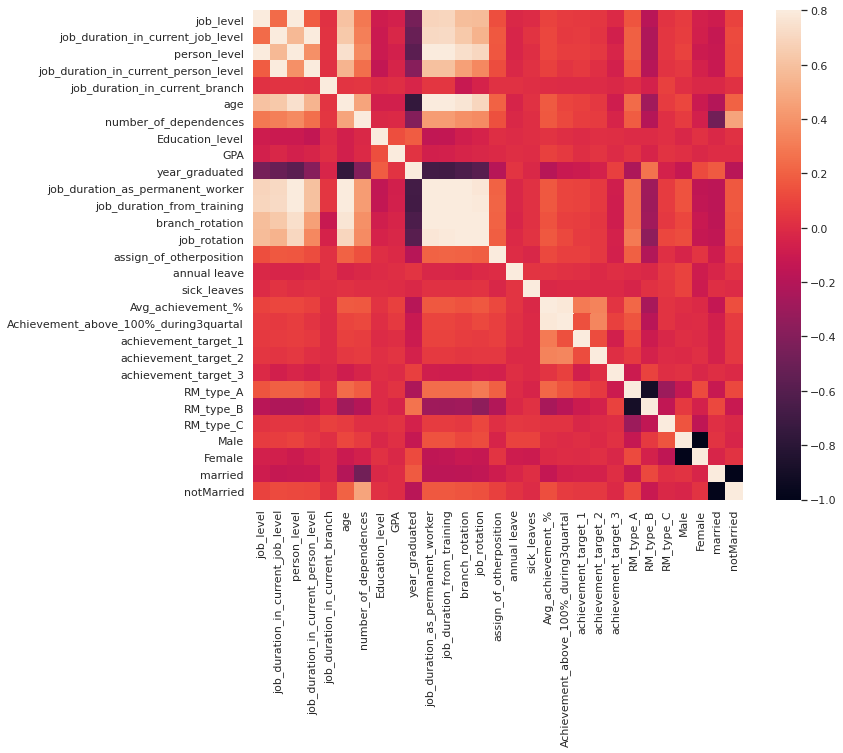

In [ ]:
#correlation matrix
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True);

In [ ]:
df_all_corr = X_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Last_achievement_%'].head()

,Feature 1,Feature 2,Correlation Coefficient


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


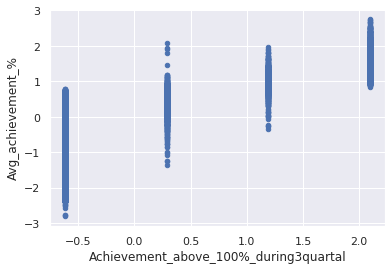

In [ ]:
var = 'Achievement_above_100%_during3quartal'
data = pd.concat([X_train['Avg_achievement_%'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='Avg_achievement_%');

# ML

In [ ]:
X_train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Avg_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3', 'RM_type_A',
       'RM_type_B', 'RM_type_C', 'Male', 'Female', 'married', 'notMarried'],
      dtype='object')

In [ ]:
#X_train_ready = X_train.drop(columns='Best Performance')
#y_train = X_train['Best Performance']

In [ ]:
#X_train_ready

In [ ]:
y_train

0        0
1        0
2        0
3        0
6        1
        ..
21998    0
21999    0
22000    0
22002    0
22003    0
Name: Best Performance, Length: 11727, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Predicting train results

In [ ]:
y_pred = classifier.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[9999    0]
 [   0 1728]]


1.0

In [ ]:
y_test_pred = classifier.predict(X_test)

In [ ]:
submission = pd.DataFrame(y_test_pred, 
             columns=['Best Performance'])

In [ ]:
submission = submission.reset_index()

In [ ]:
submission.to_csv('submissiontgl2.csv', index=False)
print("Done")

Done


In [ ]:
X_test.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Avg_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3', 'RM_type_A',
       'RM_type_B', 'RM_type_C', 'Male', 'Female', 'married', 'notMarried'],
      dtype='object')

In [ ]:
submission

,index,Best Performance
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
5995,5995,1
5996,5996,0
5997,5997,0
5998,5998,0


In [ ]:
X_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,RM_type_A,RM_type_B,RM_type_C,Male,Female,married,notMarried
0,3.617336,-0.497847,2.501080,-0.507406,-0.817011,0.605491,1.142736,-1.525074,0.960670,-1.333121,1.335375,1.486317,1.327974,2.953928,-0.074349,-0.244886,-0.045109,0.565070,0.286772,0.088564,-0.331187,0.628286,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,-0.252441,-0.400650,-0.340302,-0.348220,0.850079,-0.456677,-1.139234,0.387711,0.443484,0.437550,-0.448127,-0.449988,-0.705022,-0.814293,0.314541,0.131988,-0.045109,-0.554073,-0.615314,-1.200015,-0.331187,0.628286,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.252441,-0.248780,-0.340302,-0.099491,0.294382,-0.456677,0.001751,0.387711,0.565175,0.437550,-0.448127,-0.449988,-0.298422,-0.814293,-0.463239,-0.621760,-0.365325,-1.053968,-0.615314,0.088564,-0.331187,0.628286,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3.617336,3.499378,3.921772,3.054384,0.294382,2.729825,2.283721,0.387711,-1.891455,0.943456,3.118877,3.035361,1.734574,0.800659,3.814551,-0.244886,-0.365325,0.338047,-0.615314,0.088564,-0.331187,-1.591632,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.252441,-0.194106,-0.340302,-0.009949,-0.817011,0.180624,0.001751,-1.525074,1.044332,-0.321309,-0.051793,-0.062727,0.921375,-0.275975,-0.463239,-0.244886,-0.365325,1.757275,2.090946,0.088564,-1.729758,0.628286,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-4.122219,0.310103,-3.181684,0.815829,1.683624,-0.244243,-1.139234,0.387711,-1.891455,0.184597,-0.646294,-0.643619,-1.111621,-1.352610,-0.463239,-0.998635,-0.365325,-0.770891,-0.615314,0.088564,-0.331187,-1.591632,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5996,-0.252441,-0.649717,-0.340302,-0.756134,-0.817011,-0.244243,0.001751,-1.525074,0.694471,0.437550,-0.448127,-0.449988,-0.298422,-0.275975,-0.463239,-1.375509,-0.365325,0.435660,-0.615314,0.088564,-0.331187,0.628286,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5997,-0.252441,-0.248780,-0.340302,-0.099491,0.761168,-0.031810,1.142736,0.387711,0.747711,-0.068356,0.146373,0.130903,0.514776,-0.275975,-0.463239,-0.244886,-0.365325,1.381466,2.090946,1.377143,2.465955,0.628286,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5998,-0.252441,-0.194106,-0.340302,-0.009949,0.016534,0.393057,-1.139234,0.387711,0.557569,-0.321309,-0.051793,-0.062727,0.514776,-0.275975,-0.463239,-0.998635,-0.365325,0.712672,-0.615314,1.377143,1.067384,-1.591632,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,RM_type_A,RM_type_B,RM_type_C,Male,Female,married,notMarried
0,3.617336,3.499378,3.921772,6.039125,-0.817011,4.641726,2.283721,0.387711,-0.126941,-5.633323,4.704213,4.584405,2.141173,1.877294,-0.463239,1.639485,-0.365325,0.092241,-0.615314,0.088564,-0.331187,0.628286,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.252441,1.780207,1.080389,0.069644,0.016534,1.455224,2.283721,0.387711,0.580386,-2.091980,1.731709,1.873578,1.327974,1.877294,3.036771,-0.244886,-0.365325,1.244069,2.090946,0.088564,1.067384,0.628286,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.252441,-0.248780,-0.340302,-0.099491,0.294382,1.242791,0.001751,2.300497,0.565175,-0.574262,1.731709,1.679947,2.141173,2.953928,-0.463239,0.885736,-0.365325,0.268387,-0.615314,1.377143,-0.331187,-1.591632,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.252441,3.450780,1.080389,2.059471,-1.183771,0.393057,-1.139234,-1.525074,-1.891455,-0.827215,0.344540,0.324534,0.514776,0.800659,-0.463239,-0.244886,-0.365325,0.892664,1.188859,0.088564,1.067384,-1.591632,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,-0.252441,-0.297378,-0.340302,-0.179084,0.105445,-0.031810,-1.139234,0.387711,0.884613,-0.321309,-0.051793,-0.062727,1.327974,0.800659,-0.463239,-1.375509,0.275106,0.002023,-0.615314,0.088564,-0.331187,0.628286,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,3.617336,0.261504,3.921772,-1.422726,0.294382,4.429292,1.142736,0.387711,-1.891455,-4.621511,3.911545,3.809883,2.954371,4.030563,-0.074349,-1.375509,-0.365325,0.834984,0.286772,0.088564,-0.331187,0.628286,1.0,0.0,0.0,1.0,0.0,0.0,1.0
21999,-0.252441,-0.194106,-0.340302,-0.009949,1.039016,-0.244243,-1.139234,0.387711,0.481513,-0.068356,-0.249960,-0.256358,-0.705022,-0.814293,-0.463239,2.016359,0.275106,0.064732,-0.615314,0.088564,-0.331187,0.628286,1.0,0.0,0.0,0.0,1.0,0.0,1.0
22000,-0.252441,-0.449248,-0.340302,-0.427813,2.428258,-0.031810,0.001751,0.387711,0.268554,-0.068356,-0.249960,-0.256358,-0.705022,-0.814293,-0.463239,-0.621760,-0.365325,0.222095,-0.615314,0.088564,1.067384,0.628286,0.0,1.0,0.0,0.0,1.0,0.0,1.0
22002,-0.252441,-0.449248,-0.340302,-0.427813,-1.372708,0.605491,1.142736,0.387711,0.466301,-0.827215,0.146373,0.130903,0.514776,0.262342,-0.463239,-0.244886,0.275106,1.867311,2.090946,0.088564,1.067384,0.628286,1.0,0.0,0.0,0.0,1.0,0.0,1.0
